In [24]:
import numpy as np
import matplotlib.pyplot as plt
import ompy as om
import logging

import scipy as sp
#%matplotlib widget
from ipywidgets import widgets #interact, interactive, fixed, interact_manual

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter, LogFormatter)

import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [25]:

plt.rcParams["figure.autolayout"] = True

#size of errorbar caps
plt.rcParams["errorbar.capsize"] = 3

#setting label sizes
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 12


#set linewidths and markersize
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.markersize'] = 7

#set x and y axis
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['legend.frameon'] = False

#setting different dpi for notebook and saving
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams["figure.dpi"] = 80

plt.rcParams['text.usetex'] = True

In [26]:
def set_size(width=390, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [27]:
def set_size_square(width=390, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [28]:
om.__full_version__;

In [29]:
# For reproducability we seed the random generator.
# Note that by default several other classes in ompy, such as all
# classes with multinest calculations have a default seed, too
np.random.seed(1382398)

In [30]:
# Import raw matrix into instance of om.Matrix()
e_de_U233 = om.Matrix(path="calibration_matrices/e_de_U233")
nai_e_U233 = e_de = om.Matrix(path="calibration_matrices/nai_e_U233")
nai_e_t_c_U233 = e_de = om.Matrix(path="calibration_matrices/nai_e_t_c_U233")


e_de_Pb208 = om.Matrix(path="calibration_matrices/e_de_Pb208")
nai_e_Pb208 = om.Matrix(path="calibration_matrices/nai_e_nogate")
nai_e_t_c_Pb208 = om.Matrix(path="calibration_matrices/nai_e_t_c_Pb208")


#NaI calibration matrixes
nai_e_Pb208_tritiumgate_precal = om.Matrix(path="calibration_matrices/nai_e_Pb208_tritiumgate_precal")
nai_e_Pb208_tritiumgate_cal = om.Matrix(path="calibration_matrices/nai_e_Pb208_tritiumgate_cal")
nai_e_Pb208_alphagate_precal = om.Matrix(path="calibration_matrices/nai_e_Pb208_alphagate_precal")
nai_e_Pb208_alphagate_cal = om.Matrix(path="calibration_matrices/nai_e_Pb208_alphagate_cal")
nai_e_Pb208_nogate_precal = om.Matrix(path="calibration_matrices/nai_e_Pb208_nogate_precal")
nai_e_Pb208_nogate_cal = om.Matrix(path="calibration_matrices/nai_e_Pb208_nogate_cal")
nai_e_Pb208_tritiumgate_precal_gain1 = om.Matrix(path="calibration_matrices/nai_e_Pb208_tritiumgate_nocal_NaIgain1")
nai_e_Pb208_alphagate_precal_gain1 = om.Matrix(path="calibration_matrices/nai_e_Pb208_alphagate_nocal_NaIgain1")

In [31]:
def import_Qkinz(filename, particle):
    """
    'particle' has to be either 'triton', 'alpha', 'deutron' or 'proton' og 'helium3'
    energystate' is the excited state. 0 is the first, etc
    """
    excitation_energy = []
    E_dE = []
    dE_dE = []
    E_E = []
    dE_E = []
    total_particle_E = []

    start = False
    infile = open(filename, 'r', encoding='utf-8-sig')
    for line in infile:
        if  line.startswith('Ex(e+de)') and start==True:
            break
        if line.startswith('Excitation') or line.startswith('\n') or line.startswith('chi') or line.startswith('Ex(e+de)'):
            continue
        if line.startswith('Tritons:') and particle=='triton':
            start = True
            continue
        if line.startswith('Alphas:') and particle=='alpha':
            start = True
            continue
        if line.startswith('Protons:') and particle=='proton':
            start = True
            continue
        if line.startswith('Deutrons:') and particle=='deutron':
            start = True
            continue
        if line.startswith('Helium-3:') and particle=='helium3':
            start = True
            continue
        if start==True:
            values = line.split()
            for i in range(len(values)):
                values[i] = values[i].replace(',','.')
            excitation_energy.append(float(values[0])*1e-3)
            E_dE.append(float(values[1])*1e-3)
            dE_dE.append(float(values[3])*1e-3)
            E_E.append(float(values[4])*1e-3)
            dE_E.append(float(values[6])*1e-3)
            total_particle_E.append(float(values[7])*1e-3)
            continue
    infile.close()
    return excitation_energy, E_dE, dE_dE, E_E, dE_E, total_particle_E

In [32]:
#read values from qkinz bananas
Ex_U233_alphas, E_dE_U233_alphas, dE_dE_U233_alphas, E_E_U233_alphas, dE_E_U233_alphas, total_E_U233_alphas = import_Qkinz('U233_qkinz_bananas.txt', 'alpha')
Ex_U233_protons, E_dE_U233_protons, dE_dE_U233_protons, E_E_U233_protons, dE_E_U233_protons, total_E_U233_protons = import_Qkinz('U233_qkinz_bananas.txt', 'proton')
Ex_U233_deutrons, E_dE_U233_deutrons, dE_dE_U233_deutrons, E_E_U233_deutrons, dE_E_U233_deutrons, total_E_U233_deutrons = import_Qkinz('U233_qkinz_bananas.txt', 'deutron')
Ex_U233_tritons, E_dE_U233_tritons, dE_dE_U233_tritons, E_E_U233_tritons, dE_E_U233_tritons, total_E_U233_tritons = import_Qkinz('U233_qkinz_bananas.txt', 'triton')

Ex_Pb208_alphas, E_dE_Pb208_alphas, dE_dE_Pb208_alphas, E_E_Pb208_alphas, dE_E_Pb208_alphas, total_E_Pb208_alphas = import_Qkinz('Pb208_qkinz_bananas.txt', 'alpha')
Ex_Pb208_protons, E_dE_Pb208_protons, dE_dE_Pb208_protons, E_E_Pb208_protons, dE_E_Pb208_protons, total_E_Pb208_protons = import_Qkinz('Pb208_qkinz_bananas.txt', 'proton')
Ex_Pb208_deutrons, E_dE_Pb208_deutrons, dE_dE_Pb208_deutrons, E_E_Pb208_deutrons, dE_E_Pb208_eutrons, total_E_Pb208_deutrons = import_Qkinz('Pb208_qkinz_bananas.txt', 'deutron')
Ex_Pb208_tritons, E_dE_Pb208_tritons, dE_dE_Pb208_tritons, E_E_Pb208_tritons, dE_E_Pb208_tritons, total_E_Pb208_tritons = import_Qkinz('Pb208_qkinz_bananas.txt', 'triton')

In [33]:
def plot_3D(matrix, filename, xlabel='xlabel', ylabel='ylabel'):
    fig, ax = plt.subplots(figsize=(figwidth, figheigth))
    matrix.plot(ax=ax);
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
    ax.tick_params(axis='both', which='major', length=major_tick_length)
    ax.tick_params(axis='both', which='minor', length=minor_tick_length)
    ax.set_xlabel(xlabel,fontsize=label_fontsize)
    ax.set_ylabel(ylabel,fontsize=label_fontsize)
    fig.axes[1].tick_params(labelsize=tick_labelsize)
    ax.grid(color='k', linestyle='--', linewidth=.5)
    fig.savefig(filename, dpi=save_dpi)
    
def plot_2D(matrix, filename, projection_axis, xlabel='xlabel', ylabel='ylabel', yscale='log'):
    fig, ax = plt.subplots(figsize=(figwidth, figheigth))
    matrix.plot_projection(projection_axis, kind="step", ax=ax);
    plt.yscale(yscale)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis='both', which='both', labelsize=tick_labelsize, width=tick_width)
    ax.tick_params(axis='both', which='major', length=major_tick_length)
    ax.tick_params(axis='both', which='minor', length=minor_tick_length)
    ax.set_xlabel(xlabel,fontsize=label_fontsize)
    ax.set_ylabel(ylabel,fontsize=label_fontsize)
    ax.grid(color='k', linestyle='--', linewidth=.5)
    fig.savefig(filename, dpi=save_dpi)


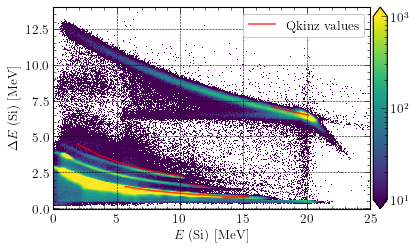

In [34]:
#plotting E_dE from U233
e_de_U233_plot = e_de_U233.copy()
e_de_U233_plot.cut('Ex', 0, 14000)
e_de_U233_plot.cut('Eg', 0, 25000)
e_de_U233_plot.Ex = e_de_U233_plot.Ex*1e-3
e_de_U233_plot.Eg = e_de_U233_plot.Eg*1e-3

fig = plt.figure(figsize = set_size(subplots=(1,1)))
gs = gridspec.GridSpec(1, 20)
ax1 = plt.subplot(gs[0:,0:19])
ax2 = plt.subplot(gs[0:,19:])


im = e_de_U233_plot.plot(ax=ax1, vmin=1e1, vmax=1e3, add_cbar=False);
im[0].set_edgecolor('face')
ax1.plot(E_E_U233_alphas, E_dE_U233_alphas, color='red', label='Qkinz values', alpha=.7);
ax1.legend(loc='upper right', facecolor='white', framealpha=1, frameon=True)
ax1.plot(E_E_U233_protons, E_dE_U233_protons, color='red', alpha=.7);
ax1.plot(E_E_U233_tritons, E_dE_U233_tritons, color='red', alpha=.7);
ax1.plot(E_E_U233_deutrons, E_dE_U233_deutrons, color='red', alpha=.7);
ax1.set_xlabel('$E$ (Si) [MeV]')
ax1.set_ylabel('$\Delta E$ (Si) [MeV]')
ax1.grid(color='k', linestyle='--', linewidth=.5)

im = im[0]
fig.colorbar(im, cax=ax2, extend='both')

fig.savefig('calibration_plots/U233_bananas_qkinz')




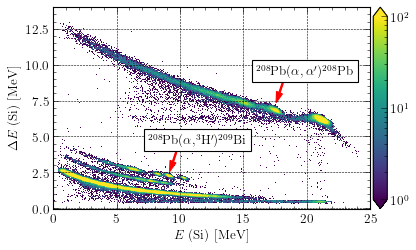

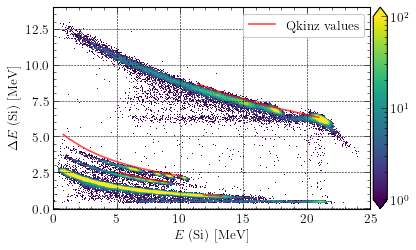

In [35]:
#plotting E_dE from Pb208
e_de_Pb208_plot = e_de_Pb208.copy()
e_de_Pb208_plot.cut('Ex', 0, 14000)
e_de_Pb208_plot.cut('Eg', 0, 25000)
e_de_Pb208_plot.Ex = e_de_Pb208_plot.Ex*1e-3
e_de_Pb208_plot.Eg = e_de_Pb208_plot.Eg*1e-3

#Plotting 208Pb banans, with arrows
fig = plt.figure(figsize = set_size(subplots=(1,1)))
gs = gridspec.GridSpec(1, 20)
ax1 = plt.subplot(gs[0:,0:19])
ax2 = plt.subplot(gs[0:,19:])

im = e_de_Pb208_plot.plot(ax=ax1, vmin=1e0, vmax=1e2, add_cbar=False);
im[0].set_edgecolor('face')
ax1.text(7.5, 4.5, '$^{208}$Pb$(\\alpha,^3$H$^\prime)^{209}$Bi', color='black', bbox=dict(facecolor='white', alpha=1))
ax1.text(16, 9.3, '$^{208}$Pb$(\\alpha,\\alpha^\prime)^{208}$Pb', color='black', bbox=dict(facecolor='white', alpha=1))
ax1.arrow(x=9.7, y=3.9, dx=-.25, dy=-.65, width=.1, head_width=.5, color='r')
ax1.arrow(x=18.1, y=8.7, dx=-.25, dy=-.65, width=.1, head_width=.5, color='r')
ax1.set_xlabel('$E$ (Si) [MeV]')
ax1.set_ylabel('$\Delta E$ (Si) [MeV]')
ax1.grid(color='k', linestyle='--', linewidth=.5)

im = im[0]
fig.colorbar(im, cax=ax2, extend='both')

fig.savefig('calibration_plots/Pb208_bananas_arrows')





fig = plt.figure(figsize = set_size(subplots=(1,1)))
gs = gridspec.GridSpec(1, 20)
ax1 = plt.subplot(gs[0:,0:19])
ax2 = plt.subplot(gs[0:,19:])

im = e_de_Pb208_plot.plot(ax=ax1, vmin=1e0, vmax=1e2, add_cbar=False);
im[0].set_edgecolor('face')
ax1.plot(E_E_Pb208_alphas, E_dE_Pb208_alphas, color='red', alpha=.7, label='Qkinz values');
ax1.legend(loc='upper right', facecolor='white', framealpha=1, frameon=True)
ax1.plot(E_E_Pb208_protons, E_dE_Pb208_protons, color='red', alpha=.7);
ax1.plot(E_E_Pb208_tritons, E_dE_Pb208_tritons, color='red', alpha=.7);
ax1.plot(E_E_Pb208_deutrons, E_dE_Pb208_deutrons, color='red', alpha=.7);
ax1.set_xlabel('$E$ (Si) [MeV]')
ax1.set_ylabel('$\Delta E$ (Si) [MeV]')
ax1.grid(color='k', linestyle='--', linewidth=.5)

im = im[0]
fig.colorbar(im, cax=ax2, extend='both')

fig.savefig('calibration_plots/Pb208_bananas_qkinz')

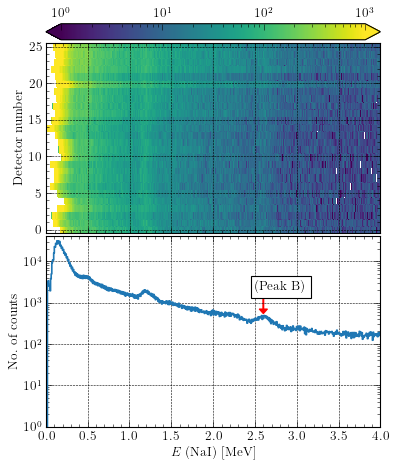

In [36]:
#Plotting e_nai from Pb208

nai_e_Pb208_plot_upper = nai_e_Pb208.copy()
nai_e_Pb208_plot_lower = nai_e_Pb208.copy()
nai_e_Pb208_plot = nai_e_Pb208.copy()

nai_e_Pb208_plot.cut('Ex', 0, 27)
nai_e_Pb208_plot.cut('Eg', 0, 4000)
nai_e_Pb208_plot.Eg = nai_e_Pb208_plot.Eg*1e-3
nai_e_Pb208_plot_lower.cut('Ex', 0, 7)
nai_e_Pb208_plot_upper.cut('Ex', 10, 27)
nai_e_Pb208_plot_lower.cut('Eg', 0, 4000)
nai_e_Pb208_plot_upper.cut('Eg', 0, 4000)
nai_e_Pb208_plot_lower.Eg = nai_e_Pb208_plot_lower.Eg*1e-3
nai_e_Pb208_plot_upper.Eg = nai_e_Pb208_plot_upper.Eg*1e-3
nai_e_Pb208_plot_upper.Ex = nai_e_Pb208_plot_upper.Ex-2

fig = plt.figure(figsize = set_size(subplots=(2,1)))
gs = gridspec.GridSpec(21, 1)
ax1 = plt.subplot(gs[1:11,0])
ax2 = plt.subplot(gs[11:21,0])
ax3 = plt.subplot(gs[0:1,0])

im = nai_e_Pb208_plot_upper.plot(ax=ax1, vmin=1, vmax=1e3, add_cbar=False, alpha=1);
im[0].set_edgecolor('face')
im = nai_e_Pb208_plot_lower.plot(ax=ax1, vmin=1, vmax=1e3, add_cbar=False, alpha=1);
im[0].set_edgecolor('face')
ax1.set_xlabel('')
ax1.set_xticks(np.linspace(.5,3.5,7))
ax1.set_ylabel('Detector number')
ax1.grid(color='k', linestyle='--', linewidth=.5)

cb = fig.colorbar(im[0], cax=ax3, orientation='horizontal', extend='both')
cb.ax.xaxis.set_ticks_position("top")
ax3.tick_params(axis='both', which='major', labelsize=12)

nai_e_Pb208_plot.plot_projection('Eg', kind="step", ax=ax2);
ax2.arrow(x=2.6, y=1.5e3, dx=-0, dy=-800, width=.01, head_width=.1, head_length = 160, color='r')
ax2.set_yscale('log')
ax2.set_xlabel('$E$ (NaI) [MeV]')
ax2.set_ylabel('No. of counts')
ax2.grid(color='k', linestyle='--', linewidth=.5)
ax2.text(2.5, 2e3, '(Peak B)', color='black', bbox=dict(facecolor='white', alpha=1))
ax2.set_ylim(1e0,4e4)
ax2.set_xlim(0,4)

fig.savefig('calibration_plots/Pb208_nai_e')

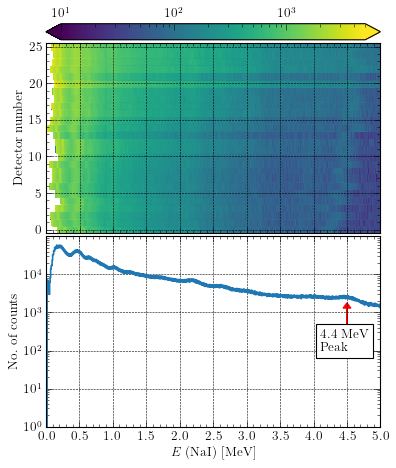

In [37]:
#Plotting e_nai from U233

nai_e_U233_plot = nai_e_U233.copy()
nai_e_U233_plot.cut('Ex', 0, 27)
nai_e_U233_plot.cut('Eg', 0, 5000)
nai_e_U233_plot.Eg = nai_e_U233_plot.Eg*1e-3

nai_e_U233_plot_upper = nai_e_U233.copy()
nai_e_U233_plot_lower = nai_e_U233.copy()

nai_e_U233_plot_lower.cut('Ex', 0, 7)
nai_e_U233_plot_upper.cut('Ex', 10, 27)
nai_e_U233_plot_lower.cut('Eg', 0, 5000)
nai_e_U233_plot_upper.cut('Eg', 0, 5000)
nai_e_U233_plot_lower.Eg = nai_e_U233_plot_lower.Eg*1e-3
nai_e_U233_plot_upper.Eg = nai_e_U233_plot_upper.Eg*1e-3
nai_e_U233_plot_upper.Ex = nai_e_U233_plot_upper.Ex-2

fig = plt.figure(figsize = set_size(subplots=(2,1)))
gs = gridspec.GridSpec(21, 1)
ax1 = plt.subplot(gs[1:11,0])
ax2 = plt.subplot(gs[11:21,0])
ax3 = plt.subplot(gs[0:1,0])

im = nai_e_U233_plot_upper.plot(ax=ax1, vmin=1e1, vmax=5e3, add_cbar=False);
im[0].set_edgecolor('face')
im = nai_e_U233_plot_lower.plot(ax=ax1, add_cbar=False, vmin=1e1, vmax=5e3);
im[0].set_edgecolor('face')
ax1.set_xlabel('')
ax1.set_xticks(np.linspace(.5,4.5,9))
ax1.set_ylabel('Detector number')
ax1.grid(color='k', linestyle='--', linewidth=.5)


cb = fig.colorbar(im[0], cax=ax3, orientation='horizontal', extend='both')
cb.ax.xaxis.set_ticks_position("top")
ax3.tick_params(axis='both', which='major', labelsize=12)

nai_e_U233_plot.plot_projection('Eg', kind="step", ax=ax2);
ax2.set_yscale('log')
ax2.set_xlabel('$E$ (NaI) [MeV]')
ax2.set_ylabel('No. of counts')
ax2.set_yticks(np.logspace(0,4,5))
ax2.grid(color='k', linestyle='--', linewidth=.5)
ax2.set_ylim(1e0, 1e5)
ax2.set_xlim(0,5)
ax2.set_xticks(np.linspace(0,5,11))
ax2.arrow(x=4.5, y=5e2, dx=-0, dy=800, width=.01, head_width=.12, head_length = 500, color='r')
ax2.text(4.1, 9.5e1, '4.4 MeV\n Peak', color='black', bbox=dict(facecolor='white', alpha=1))

fig.savefig('calibration_plots/U233nai_e')


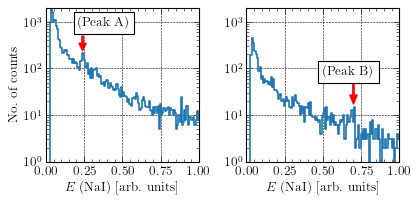

In [38]:
#Plotting e_nai from Pb208 (tritiumgate, pre-calibration)

nai_e_Pb208_tritiumgate_precal_gain1_plot = nai_e_Pb208_tritiumgate_precal_gain1.copy()
nai_e_Pb208_tritiumgate_precal_gain1_plot.cut('Ex', 0, 27)
nai_e_Pb208_tritiumgate_precal_gain1_plot.cut('Eg', 0, 1000)
nai_e_Pb208_tritiumgate_precal_gain1_plot.Eg = nai_e_Pb208_tritiumgate_precal_gain1_plot.Eg*1e-3

nai_e_Pb208_alphagate_precal_gain1_plot = nai_e_Pb208_alphagate_precal_gain1.copy()
nai_e_Pb208_alphagate_precal_gain1_plot.cut('Ex', 0, 27)
nai_e_Pb208_alphagate_precal_gain1_plot.cut('Eg', 0, 1000)
nai_e_Pb208_alphagate_precal_gain1_plot.Eg = nai_e_Pb208_alphagate_precal_gain1_plot.Eg*1e-3

fig = plt.figure(figsize = set_size_square(subplots=(1,2)))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0,0:1])
ax2 = plt.subplot(gs[0,1:2])

nai_e_Pb208_tritiumgate_precal_gain1_plot.plot_projection('Eg', kind="step", ax=ax1);
ax1.arrow(x=0.24, y=500, dx=0, dy=-150, width=.01, head_width=.05, head_length = 110, color='r')
ax1.set_yscale('log')
ax1.set_xlabel('')
ax1.set_ylabel('No. of counts')
ax1.grid(color='k', linestyle='--', linewidth=.5)
ax1.text(0.21, 8e2, '(Peak A)', color='black', bbox=dict(facecolor='white', alpha=1))
ax1.set_ylim(1e0,2e3)
ax1.set_xlim(0,1)

nai_e_Pb208_alphagate_precal_gain1_plot.plot_projection('Eg', kind="step", ax=ax2);
ax2.arrow(x=0.7, y=5e1, dx=0, dy=-23, width=.01, head_width=.05, head_length = 10, color='r')
ax2.set_yscale('log')
ax2.set_xlabel('$E$ (NaI) [arb. units]')
ax1.set_xlabel('$E$ (NaI) [arb. units]')
ax1.set_xticks(np.linspace(0,1,5))
ax2.set_xticks(np.linspace(0,1,5))
ax2.grid(color='k', linestyle='--', linewidth=.5)
ax2.text(0.5, 7e1, '(Peak B)', color='black', bbox=dict(facecolor='white', alpha=1))
ax2.set_ylim(1e0,2e3)
ax2.set_xlim(0,1)

fig.savefig('calibration_plots/Pb208_nai_e_px')

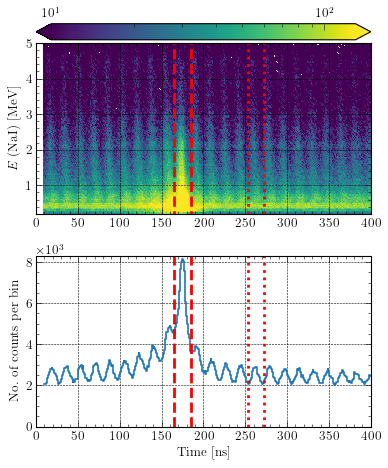

In [39]:
#Plotting nai_e_t_c_U233
nai_e_t_c_U233_plot = nai_e_t_c_U233.copy()
nai_e_t_c_U233_plot.cut('Ex', 10, 400)
nai_e_t_c_U233_plot.cut('Eg', 0, 5000)
nai_e_t_c_U233_plot.Eg = nai_e_t_c_U233_plot.Eg*1e-3
nai_e_t_c_U233_plot_copy = nai_e_t_c_U233_plot.copy()
#nai_e_t_c_U233_plot_copy.values = nai_e_t_c_U233_plot_copy.values*1e-3


#need to also add plot of nai_e_t_c (timecuts with energy):

nai_e_t_c_U233_plot.values = np.rot90(nai_e_t_c_U233_plot.values)
nai_e_t_c_U233_plot.values = np.rot90(nai_e_t_c_U233_plot.values)
nai_e_t_c_U233_plot.values = np.rot90(nai_e_t_c_U233_plot.values)
nai_e_t_c_U233_plot.values = np.flip(nai_e_t_c_U233_plot.values, 1)

Eg_saved = nai_e_t_c_U233_plot.copy().Eg
nai_e_t_c_U233_plot.Eg = nai_e_t_c_U233_plot.copy().Ex
nai_e_t_c_U233_plot.Ex = Eg_saved






fig = plt.figure(figsize = set_size(subplots=(2,1)))
gs = gridspec.GridSpec(21, 1)
ax1 = plt.subplot(gs[12:21,0])
ax2 = plt.subplot(gs[1:10,0])
ax3 = plt.subplot(gs[0:1,0])

im = nai_e_t_c_U233_plot_copy.plot_projection('Ex', kind="step", ax=ax1);
ax1.set_xlabel('Time [ns]')
ax1.set_ylabel('No. of counts per bin')
ax1.grid(color='k', linestyle='--', linewidth=.5)
ax1.plot([165, 165], [0, 8.3e3], '--', color='red', linewidth=2.5);
ax1.plot([185, 185], [0, 8.3e3], '--', color='red', linewidth=2.5);
ax1.plot([253, 253], [0, 8.3e3], ':', color='red', linewidth=2.5);
ax1.plot([273, 273], [0, 8.3e3], ':', color='red', linewidth=2.5);
ax1.set_ylim(0,8.3e3)
ax1.ticklabel_format(axis='y', style='scientific', scilimits=[0,0], useMathText=True)

im = nai_e_t_c_U233_plot.plot(ax=ax2, vmin=1e1, vmax = 1.3e2, add_cbar=False, alpha=1);
im[0].set_edgecolor('face')
ax2.set_xlabel('')
ax2.set_ylabel('$E$ (NaI) [MeV]')
ax2.grid(color='k', linestyle='--', linewidth=.5)
ax2.plot([165, 165], [0, 5], '--', color='red', linewidth=2.5);
ax2.plot([185, 185], [0, 5], '--', color='red', linewidth=2.5);
ax2.plot([253, 253], [0, 5], ':', color='red', linewidth=2.5);
ax2.plot([273, 273], [0, 5], ':', color='red', linewidth=2.5);
ax2.set_ylim(0.2,5)
ax2.set_xlim(0,400)
ax1.set_xlim(ax2.get_xlim())
cb = fig.colorbar(im[0], cax=ax3, orientation='horizontal', extend='both')
cb.ax.xaxis.set_ticks_position("top")
ax3.tick_params(axis='both', which='major', labelsize=12)

fig.savefig('calibration_plots/nai_e_t_c_U233')